# **Data Inspection**

## Objectives

* Evaluate data using visualisations.
* Develop and document strategy for answering the two business requirements.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* Explanations of analysis and visualisations to back up strategic approach.

## Crisp-DM

* Data Understanding


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml'

# Load Data

Load data and display head to check that it has been loaded.

In [4]:
import pandas as pd
df_sales = pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
df_inherited = pd.read_csv("outputs/datasets/collection/inherited_houses.csv")
print("Sales Data")
df_sales.head()


Sales Data


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [5]:
print("Inherited Houses")
df_inherited.head()

Inherited Houses


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


---

# Dataset Analysis 

Analysis of Data Types, comparing the datasets

Profile Report of all variables using ydata profiling

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df_sales, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from profiling


1. Variables can be categorised into four groups. Physical Attributes (14), Quality Descriptions (6), Age Values (2) and Sale Price (1)

|Variable Type|Presence|#|Variables|
|:----|:----|:----|:----|
|Physical Attribute|Always|6|1stFlrSF, BsmtUnfSF, TotalBsmtSF, GarageArea, GrLivArea, LotArea|
| |Optional|8|2ndFlrSF, BedroomAbvGr, BsmtFinType1, LotFrontage, MasVnrArea, EnclosedPorch, OpenPorchSF, WoodDeckSF|
|Quality Description|Always|4|BsmtFinSF1, KitchenQual, OverallCond, OverallQual|
| |Optional|2|BsmtExposure, GarageFinish|
|Age|Always|2|YearBuilt, YearRemodAdd|
| |Optional|1|GarageYrBlt|
|Price|Always|1|SalePrice|

2. Physical Attributes. 6 variables contain a full set of data. 8 variables contain some data with a mix of zeroes and missing data. Missing data and zeroes will have to be dealt with.

3. Quality Description. 4 variables contain a full set of data, describing the condition of the house. 8 variables contain some data but also zeroes and missing data. 

4. Age. 2 variables contain a full set of data. The garage variable only contains a value where the property has a garage. 81 properties do not have a garage.

5. Sale Price. The target variable.

6. 9 variables have an alert warning for missing data. We will need a strategy to handle missing data.

7. 9 variables have an alert warning for zero values. We will need a strategy to handle zero values.

8. For YearRemodAdd, the spike in the number of properties with a value of 1950 does not fit with the rest of the distribution and warrants clarification with the client. Further analysis to be conducted on the year built date.


### Data Visualisations

We can conduct preliminary analysis of selected variables plotted against the sale price, using visualisations to check for visual correlations.

Variables of Interest:

1. 1stFlrSF
2. GrLivArea
3. 2ndFlrSF
4. BedroomAbvGr
5. OverallCond, 
6. OverallQual
7. YearBuilt

1stFlrDF v SalePrice

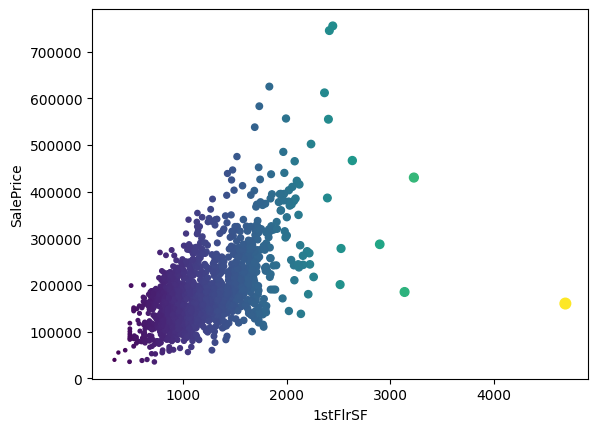

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x, y = '1stFlrSF', 'SalePrice'

plt.scatter(data=df_sales, x=x, y=y, c=x, s=df_sales[x]/80)
plt.ylabel(y)
plt.xlabel(x)
plt.show()



The data shows a positive correlation between the variables, which is not unexpected. The price variance increases as the size increases, meaning smaller houses have a smaller price range. 

2. GrLivArea v SalePrice

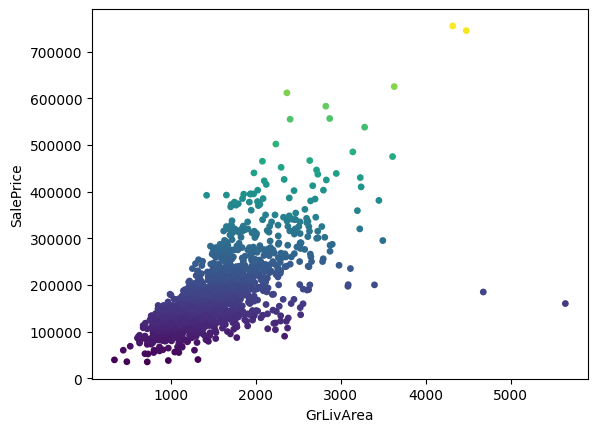

In [28]:
x, y = 'GrLivArea', 'SalePrice', 

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

The data shows a positive correlation between the price and above grade (ground) living area square feet. There are some outliers but the correlation is clear.

3. 2ndFlrSF v SalePrice

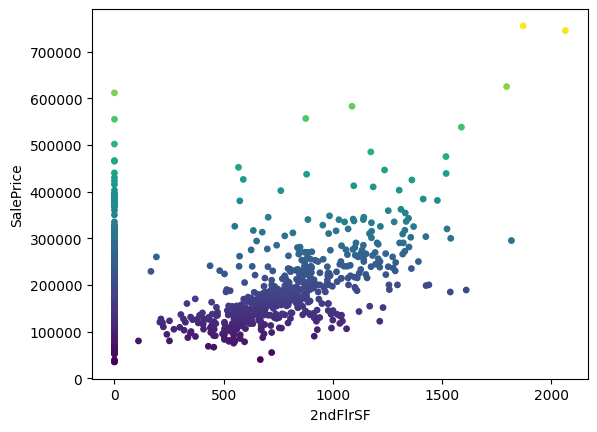

In [34]:
x, y = '2ndFlrSF', 'SalePrice' 

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

There is a weak positive visual correlation between the variables here. Many properties do not have this feature, but the distribution of sale prices of those without the feature appear to be similar to those that do. 

4. BedroomAbvGr v SalePrice

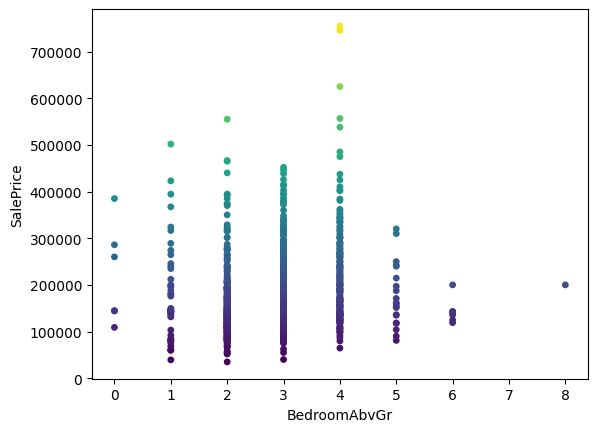

In [26]:
x, y = 'BedroomAbvGr', 'SalePrice'

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

This data is showing that bedrooms above ground level has a correlation with the sale price below 5 bedrooms. There are less properties with 5 and above bedrooms and their sale prices do not appear to fit (visually) a positive correlation. 

5. OverallCond v SalePrice

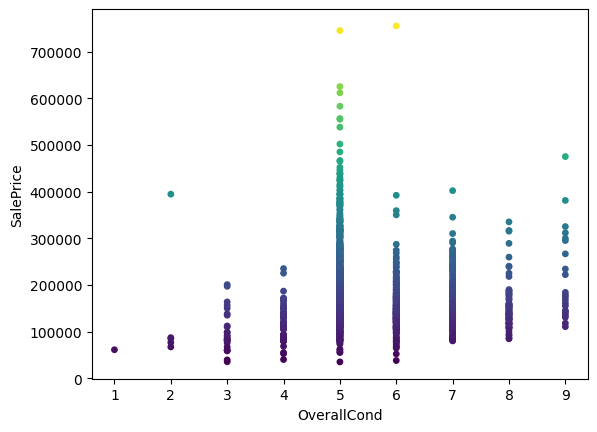

In [29]:
x, y = 'OverallCond' , 'SalePrice' 

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

The data shows a small positive correlation between the price and overall condition. A condition of 5 is the most common value and covers the full range of sale prices. Houses in the best condition (7 and above) tend to have a higher minimum sale price. 

6. OverallQual v SalePrice

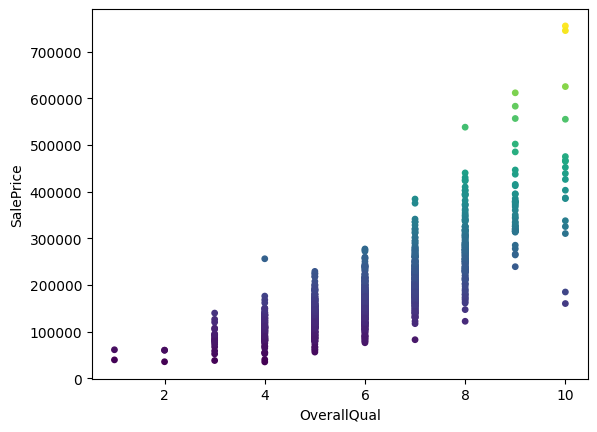

In [30]:
x, y = 'OverallQual', 'SalePrice', 

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

The previous trend with overall condition is more stark here, with a positive correlation between overall quality and sale price. The price variance increases with quality.

7. YearBuilt v SalePrice

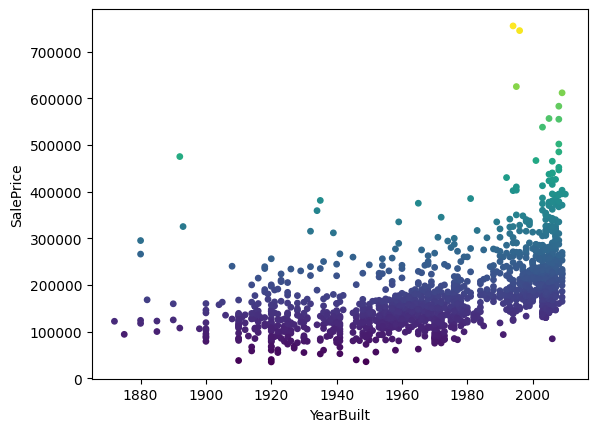

In [32]:
x, y = 'YearBuilt', 'SalePrice'

plt.scatter(data=df_sales, x=x, y=y, c=y, s=15)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
